In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
data = pd.read_csv('/content/data_othmane.csv',)

In [15]:
columns_to_keep = ['comment','sentiment', 'sarcasm', 'dangerous']
data = data[columns_to_keep]

In [16]:
data = data[data['sentiment'] != 'Mixed']
data = data[data['sentiment'] != 'Neutral']

In [17]:
data

,comment,sentiment,sarcasm,dangerous
0,للأسف كان سؤال الدكتور في حينها ساذجا وسطحيا ...,Negative,False,False
2,طريقة سرد ضعيفة جدا وفيها قفز على مفاصل مهمة ...,Negative,False,False
3,تخيل شيعي رافضي يقدم زي كذا 😂😂😂😂 كان اشغلنا ال...,Negative,True,False
4,تاريخ دوله تتسعه صفحه واحده . اتحسبون دولتكم د...,Negative,True,False
6,50:30 معلومة ماذا قدم السنه وماذا قدم الشيعه ع...,Negative,False,False
...,...,...,...,...
69839,كذابين تحاولون تبررون لبن سلمان الخسيس,Negative,False,False
69840,تلفون وتدورون عشان تحليل الدخول والشرب ولاكل ف...,Negative,False,False
69841,من شفته يتكلم عن نبي الله صالح كنه يتكلم عن وا...,Negative,False,False
69842,اف وش عندى الفلسططططينيه صارو يطلعو ويتكلم,Negative,False,False


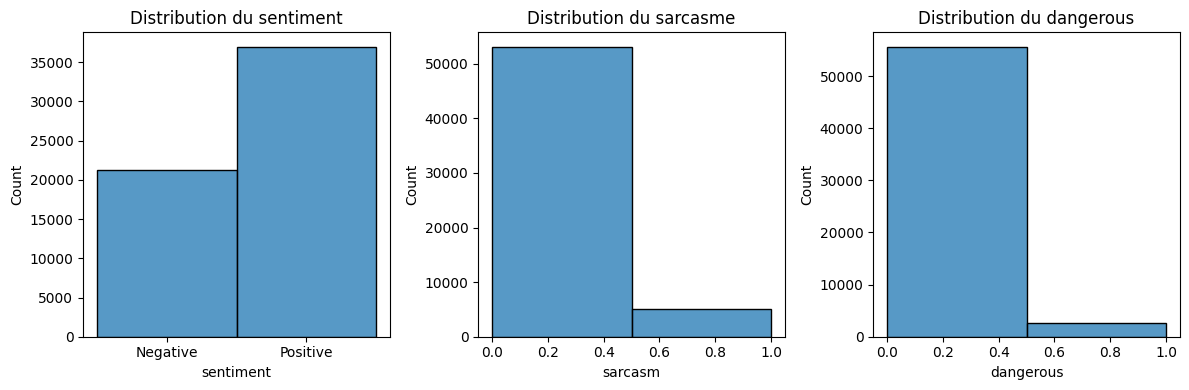

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple de données (remplacez avec vos données réelles)

df = pd.DataFrame(data)

# Tracé des histogrammes
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(df['sentiment'], bins=2, kde=False)
plt.title('Distribution du sentiment')

plt.subplot(1, 3, 2)
sns.histplot(df['sarcasm'], bins=2, kde=False)
plt.title('Distribution du sarcasme')

plt.subplot(1, 3, 3)
sns.histplot(df['dangerous'], bins=2, kde=False)
plt.title('Distribution du dangerous')

plt.tight_layout()
plt.show()


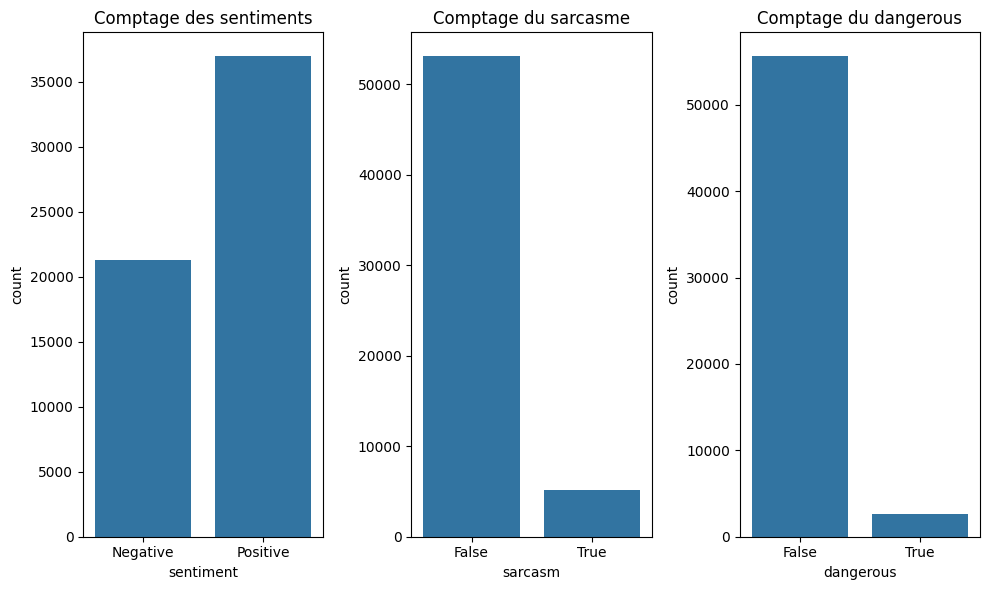

In [19]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
sns.countplot(x='sentiment', data=df)
plt.title('Comptage des sentiments')

plt.subplot(1, 3, 2)
sns.countplot(x='sarcasm', data=df)
plt.title('Comptage du sarcasme')

plt.subplot(1, 3, 3)
sns.countplot(x='dangerous', data=df)
plt.title('Comptage du dangerous')

plt.tight_layout()
plt.show()


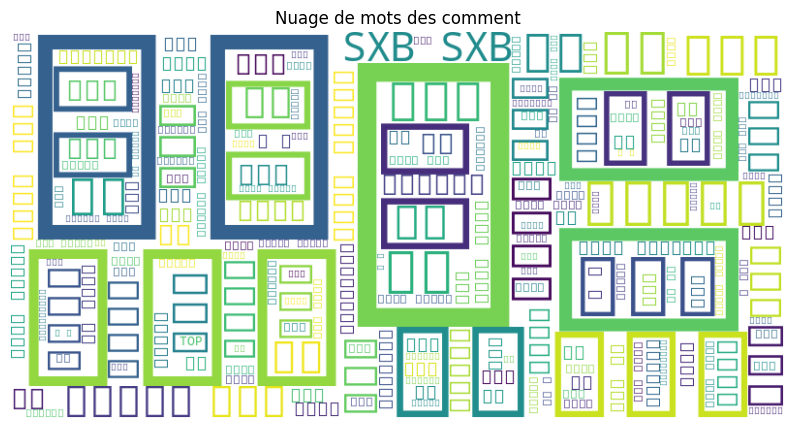

In [20]:
from wordcloud import WordCloud

# Exemple de création d'un nuage de mots à partir de commentaires
commentaires = ' '.join(df['comment'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(commentaires)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des comment')
plt.show()


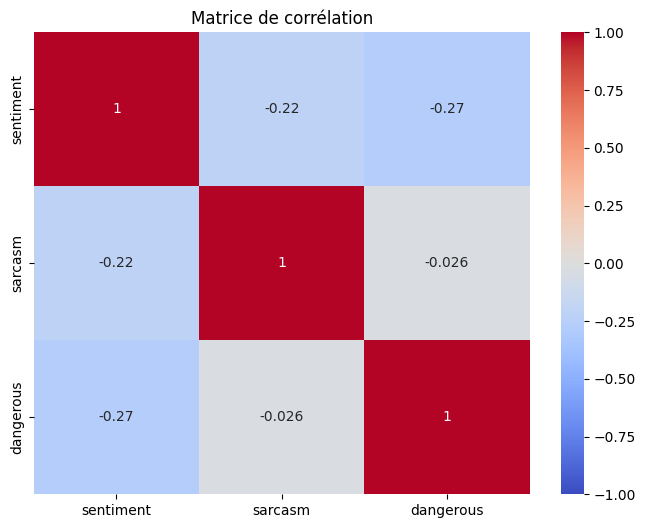

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple de données (remplacez avec vos données réelles)

df = pd.DataFrame(data)

# Convertir les valeurs textuelles en valeurs numériques
df['sentiment'] = df['sentiment'].replace({'Positive': 1, 'Negative': 0})
df['sarcasm'] = df['sarcasm'].replace({'Positive': 1, 'Negative': 0})
df['dangerous'] = df['dangerous'].replace({'Positive': 1, 'Negative': 0})

# Matrice de corrélation
corr_matrix = df[['sentiment', 'sarcasm', 'dangerous']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de corrélation')
plt.show()


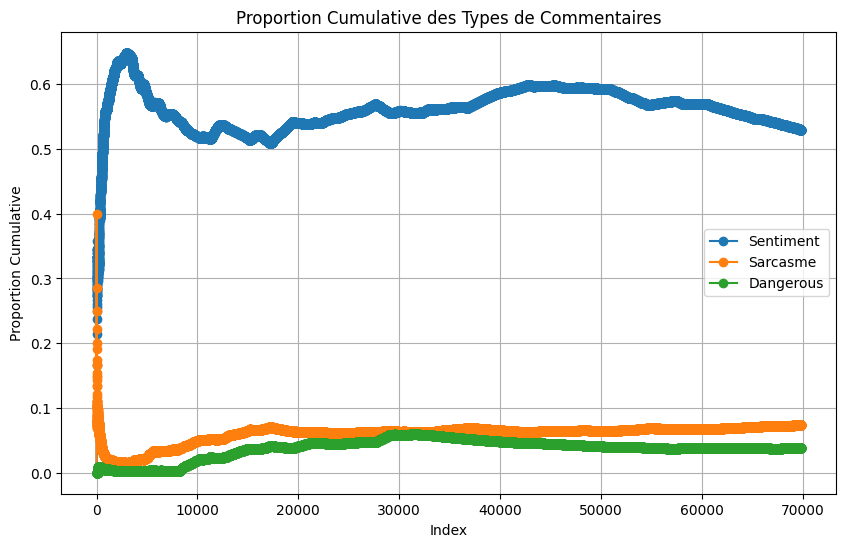

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Exemple de données (remplacez avec vos données réelles)

df = pd.DataFrame(data)

# Convertir les valeurs textuelles en valeurs numériques
df['sentiment'] = df['sentiment'].replace({'Positive': 1, 'Negative': 0})
df['sarcasm'] = df['sarcasm'].replace({'Positive': 1, 'Negative': 0})
df['dangerous'] = df['dangerous'].replace({'Positive': 1, 'Negative': 0})

# Calculer les proportions cumulées
df['sentiment_cum'] = df['sentiment'].cumsum() / (df.index + 1)
df['sarcasme_cum'] = df['sarcasm'].cumsum() / (df.index + 1)
df['dangerous_cum'] = df['dangerous'].cumsum() / (df.index + 1)

# Tracer les courbes
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['sentiment_cum'], label='Sentiment', marker='o')
plt.plot(df.index, df['sarcasme_cum'], label='Sarcasme', marker='o')
plt.plot(df.index, df['dangerous_cum'], label='Dangerous', marker='o')

plt.xlabel('Index')
plt.ylabel('Proportion Cumulative')
plt.title('Proportion Cumulative des Types de Commentaires')
plt.legend()
plt.grid(True)
plt.show()


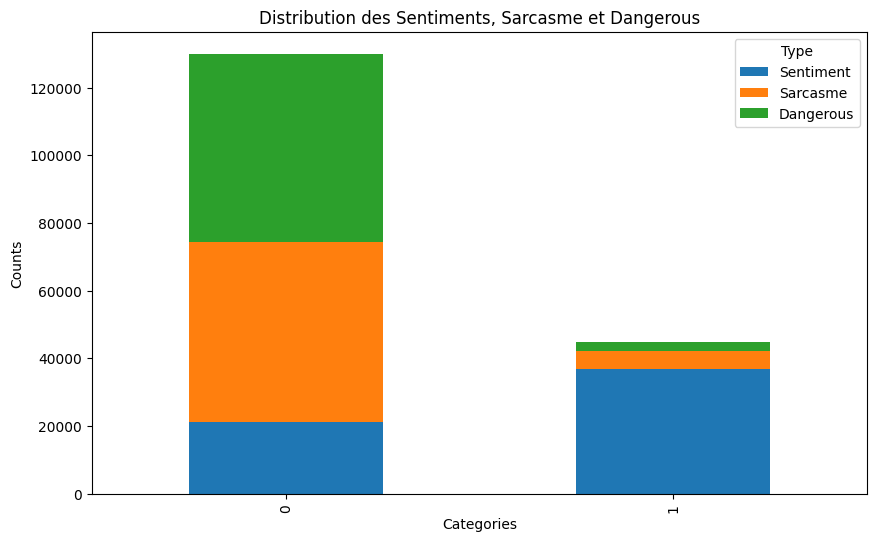

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Exemple de données (remplacez avec vos données réelles)

df = pd.DataFrame(data)

# Convertir les valeurs textuelles en valeurs numériques
df['sentiment'] = df['sentiment'].replace({'Positive': 1, 'Negative': 0})
df['sarcasm'] = df['sarcasm'].replace({'Positive': 1, 'Negative': 0})
df['dangerous'] = df['dangerous'].replace({'Positive': 1, 'Negative': 0})

# Compter le nombre de chaque catégorie pour chaque variable
sentiment_counts = df['sentiment'].value_counts()
sarcasme_counts = df['sarcasm'].value_counts()
dangerous_counts = df['dangerous'].value_counts()

# Créer un DataFrame pour les counts
counts_df = pd.DataFrame({
    'Sentiment': sentiment_counts,
    'Sarcasme': sarcasme_counts,
    'Dangerous': dangerous_counts
})

# Remplir les valeurs manquantes avec 0
counts_df = counts_df.fillna(0)

# Tracer les barres empilées
counts_df.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Distribution des Sentiments, Sarcasme et Dangerous')
plt.legend(title='Type')
plt.show()


In [24]:
# Filtrer les commentaires par classe
df_positif =data[data['sentiment'] == 'Positive']
df_negatif =data[data['sentiment'] == 'Negative']



In [25]:
df_positif_sampled = df_positif.sample(n=7500, random_state=1)
df_negatif_sampled = df_negatif.sample(n=7500, random_state=1)

In [26]:
# Concaténer les échantillons en un seul DataFrame
data = pd.concat([df_positif_sampled, df_negatif_sampled], ignore_index=True)


In [27]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['comment'])

In [28]:
y = data[['sentiment', 'sarcasm', 'dangerous']].replace({'Positive': 1, 'Negative': 0, 'True': 1, 'False': 0})

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [31]:
input_layer = Input(shape=(X_train.shape[1],))
dense_layer = Dense(128, activation='relu')(input_layer)
dense_layer = Dense(64, activation='relu')(dense_layer)

In [32]:
output_sentiment = Dense(1, activation='sigmoid', name='sentiment')(dense_layer)
output_sarcasme = Dense(1, activation='sigmoid', name='sarcasme')(dense_layer)
output_dangeros = Dense(1, activation='sigmoid', name='dangeros')(dense_layer)

In [33]:

model = Model(inputs=input_layer, outputs=[output_sentiment, output_sarcasme, output_dangeros])

In [34]:
model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

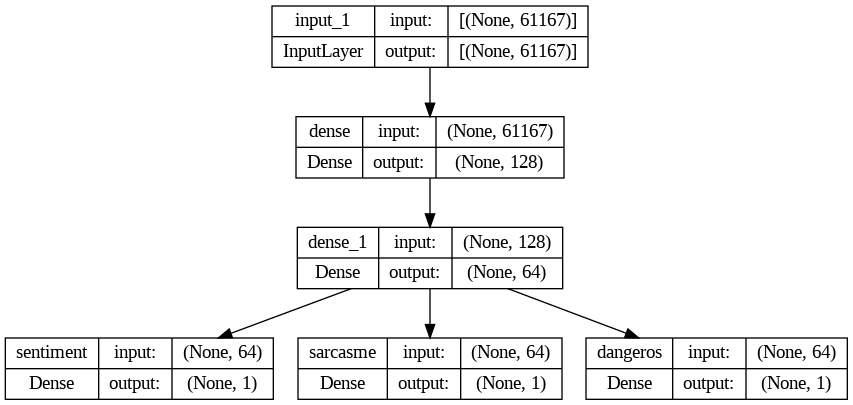

In [35]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)


In [36]:
history = model.fit(X_train.toarray(),
                    [y_train['sentiment'], y_train['sarcasm'], y_train['dangerous']],
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
300/300 [==============================] - 10s 21ms/step - loss: 1.1310 - sentiment_loss: 0.5267 - sarcasme_loss: 0.3516 - dangeros_loss: 0.2526 - sentiment_accuracy: 0.7478 - sarcasme_accuracy: 0.8956 - dangeros_accuracy: 0.9368 - val_loss: 0.8757 - val_sentiment_loss: 0.3852 - val_sarcasme_loss: 0.3049 - val_dangeros_loss: 0.1856 - val_sentiment_accuracy: 0.8350 - val_sarcasme_accuracy: 0.8942 - val_dangeros_accuracy: 0.9383
Epoch 2/10
300/300 [==============================] - 4s 12ms/step - loss: 0.4801 - sentiment_loss: 0.1673 - sarcasme_loss: 0.2047 - dangeros_loss: 0.1080 - sentiment_accuracy: 0.9439 - sarcasme_accuracy: 0.9086 - dangeros_accuracy: 0.9557 - val_loss: 0.9015 - val_sentiment_loss: 0.4109 - val_sarcasme_loss: 0.3156 - val_dangeros_loss: 0.1749 - val_sentiment_accuracy: 0.8258 - val_sarcasme_accuracy: 0.8850 - val_dangeros_accuracy: 0.9400
Epoch 3/10
300/300 [==============================] - 4s 12ms/step - loss: 0.1145 - sentiment_loss: 0.0426 - sarcasme

In [37]:
loss, sentiment_loss, sarcasme_loss, dangeros_loss, sentiment_acc, sarcasme_acc, dangeros_acc = model.evaluate(X_test.toarray(),
                                                                                                               [y_test['sentiment'], y_test['sarcasm'], y_test['dangerous']])
print(f'Sentiment accuracy: {sentiment_acc}')
print(f'Sarcasme accuracy: {sarcasme_acc}')
print(f'Dangeros accuracy: {dangeros_acc}')

94/94 [==============================] - 1s 7ms/step - loss: 1.7881 - sentiment_loss: 0.6850 - sarcasme_loss: 0.7930 - dangeros_loss: 0.3101 - sentiment_accuracy: 0.8200 - sarcasme_accuracy: 0.8777 - dangeros_accuracy: 0.9450
Sentiment accuracy: 0.8199999928474426
Sarcasme accuracy: 0.8776666522026062
Dangeros accuracy: 0.9449999928474426


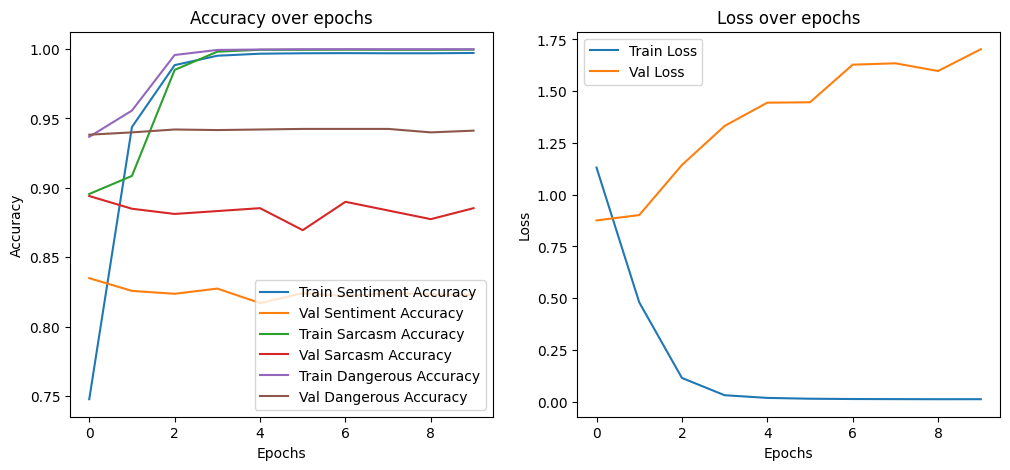

In [38]:
# Fonction pour tracer les courbes d'accuracy et de loss
def plot_history(history):
    # Tracer l'accuracy
    plt.figure(figsize=(12, 5))

    # Accuracy du sentiment
    plt.subplot(1, 2, 1)
    plt.plot(history.history['sentiment_accuracy'], label='Train Sentiment Accuracy')
    plt.plot(history.history['val_sentiment_accuracy'], label='Val Sentiment Accuracy')
    plt.plot(history.history['sarcasme_accuracy'], label='Train Sarcasm Accuracy')
    plt.plot(history.history['val_sarcasme_accuracy'], label='Val Sarcasm Accuracy')
    plt.plot(history.history['dangeros_accuracy'], label='Train Dangerous Accuracy')
    plt.plot(history.history['val_dangeros_accuracy'], label='Val Dangerous Accuracy')
    plt.title('Accuracy over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Tracer la loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Afficher les courbes
plot_history(history)


In [39]:
# Compter les occurrences de chaque valeur unique dans la colonne 'colonne'
counts = data['dangerous'].value_counts()

# Afficher les comptages
print(counts)


dangerous
False    14084
True       916
Name: count, dtype: int64


In [40]:
import numpy as np

def test_model_multiple_classes(model, vectorizer, input_text):
    # Vectoriser le nouvel input
    vectorizer = TfidfVectorizer()
    vectorizer.fit(data['comment'])

    input_vector = vectorizer.transform([input_text])

    # Trier les indices de la matrice sparse
    input_vector.sort_indices()

    # Faire la prédiction avec le modèle
    predictions = model.predict(input_vector)

    # Récupérer les classes prédites pour la tâche de sentiment
    sentiment_classes = np.where(predictions[0][0] >= 0)[0]

    # Afficher les classes prédites pour la tâche de sentiment
    if sentiment_classes.size > 0:
        print("Sentiment classes:", sentiment_classes)
    else:
        print("Aucune classe de sentiment prédite avec une probabilité supérieure à 0.5")

    # Afficher la prédiction pour les autres tâches (sarcasme et dangerosité)
    print("Sarcasme:", "True" if predictions[1][0] >= 0.5 else "False")
    print("Dangerosité:", "True" if predictions[2][0] >= 0.5 else "False")

# Utilisation de la fonction
input_text = "هذا المقال رائع للغاية"
test_model_multiple_classes(model, vectorizer, input_text)


1/1 [==============================] - 0s 361ms/step
Sentiment classes: [0]
Sarcasme: False
Dangerosité: False


94/94 [==============================] - 0s 3ms/step


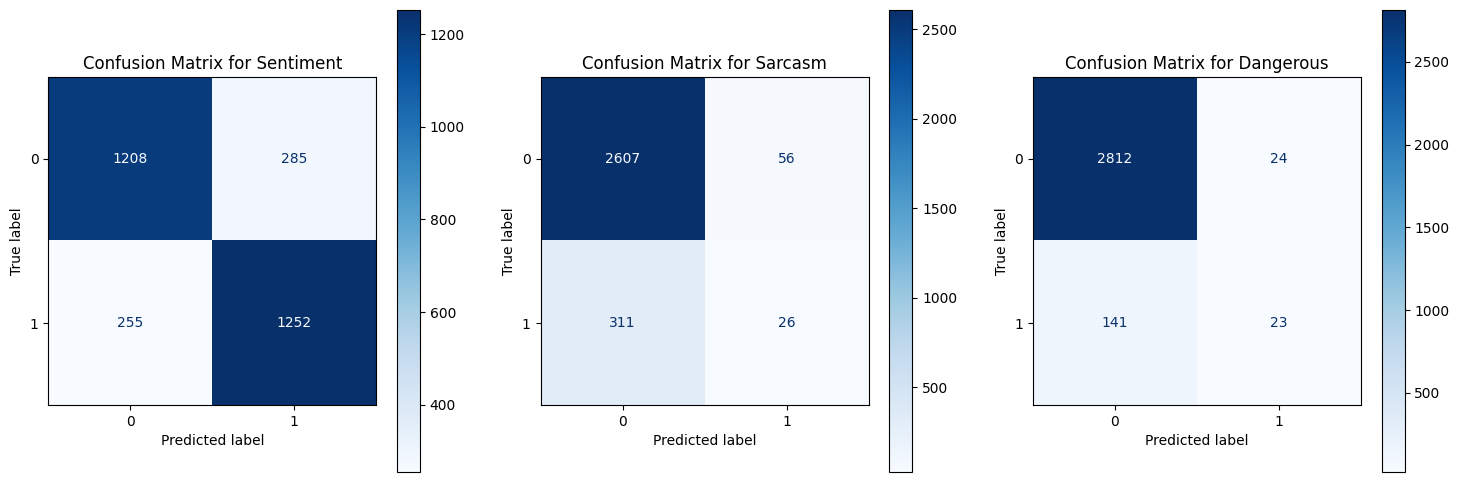

In [41]:
X_train.sort_indices()
X_test.sort_indices()
y_pred = model.predict(X_test)

# Convertir les prédictions en étiquettes binaires
y_pred_labels = [(pred > 0.5).astype(int) for pred in y_pred]

# Visualisation des matrices de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))

for i, col in enumerate(['sentiment', 'sarcasm', 'dangerous']):
    cm = confusion_matrix(y_test[col], y_pred_labels[i])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    plt.subplot(1, 3, i+1)
    disp.plot(cmap='Blues', ax=plt.gca(), values_format='d')
    plt.title(f'Confusion Matrix for {col.capitalize()}')

plt.show()

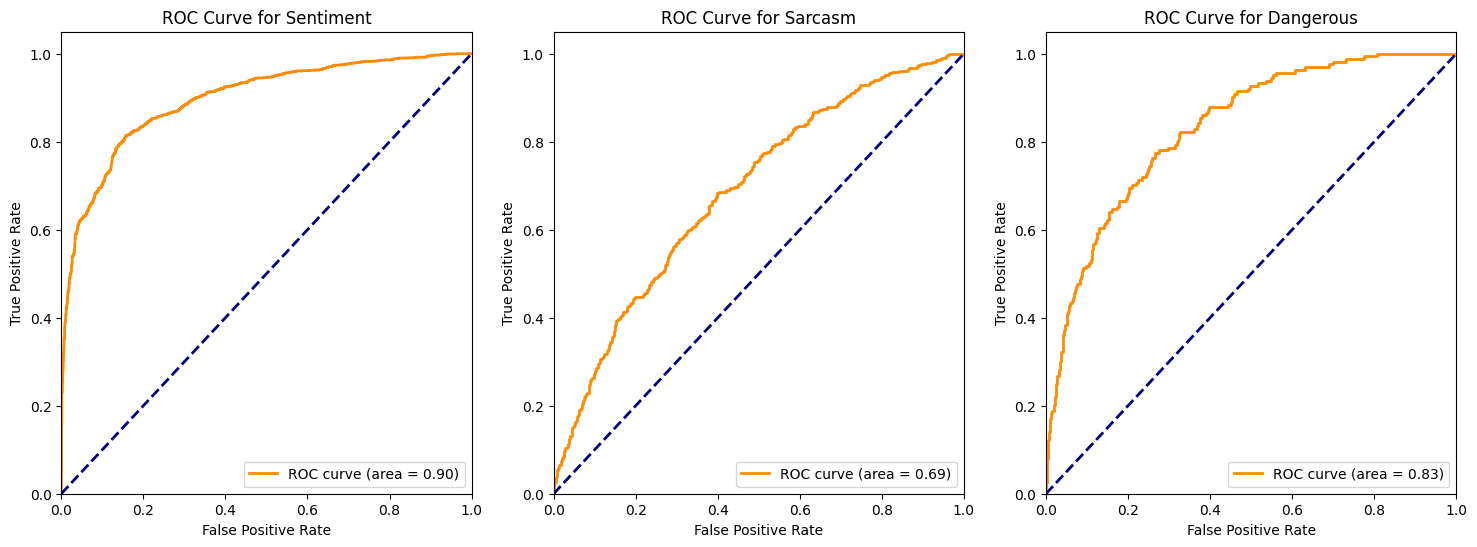

In [42]:
from sklearn.metrics import roc_curve, auc

# Tracer les courbes ROC
plt.figure(figsize=(18, 6))

for i, col in enumerate(['sentiment', 'sarcasm', 'dangerous']):
    fpr, tpr, _ = roc_curve(y_test[col], y_pred[i])
    roc_auc = auc(fpr, tpr)

    plt.subplot(1, 3, i+1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {col.capitalize()}')
    plt.legend(loc="lower right")

plt.show()


In [12]:
vectorizer.fit(data['comment'])  # Assurez-vous d'avoir vos données d'entraînement ici


NameError: name 'vectorizer' is not defined

In [ ]:
# Sauvegarde du modèle complet
model.save('C:\Users\dell\Desktop\sentiment\model')


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np


In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(data['comment'])  # Assurez-vous d'avoir vos données d'entraînement ici

def predict(input_text):
    # Vectorisation de l'input text avec le vectorizer ajusté
    input_vector = vectorizer.transform([input_text])
    input_vector.sort_indices()

    # Faire la prédiction
    predictions = model.predict(input_vector)

    # Interpréter la prédiction de sentiment
    sentiment_prediction = "Positive" if predictions[0][0] >= 0.5 else "Negative"
    sarcasm_prediction = "True" if predictions[1][0] >= 0.5 else "False"
    dangerous_prediction = "True" if predictions[2][0] >= 0.5 else "False"

    # Formater les résultats comme nécessaire
    result = {
        'sentiment': sentiment_prediction,
        'sarcasm': sarcasm_prediction,
        'dangerous': dangerous_prediction
    }

    return result

# Exemple d'utilisation dans un notebook
input_text = "هذا المقال رائع للغاية"
prediction_result = predict(input_text)
print(prediction_result)

save model


In [ ]:
from tensorflow.keras.models import save_model

# Assuming 'model' is your Keras model object
save_model(model, '/content/m/model.h5')


In [ ]:
test =load_model('/content/m/model.h5')
input_text = "هذا المقال رائع للغاية"
input_vector = vectorizer.transform([input_text])
input_vector.sort_indices()
predictions = test.predict(input_vector)
print(predictions)


In [ ]:
# save data as csv
data.to_csv('data_othmane21.csv', index=False)